In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
from qiskit import *
from math import pi
from qiskit.visualization import *

In [2]:
def createcircuit(n,qubits, measure = False):
    [q1, q2, q3, q4] = qubits
    
    qreg = QuantumRegister(n, "q")
    creg = ClassicalRegister(4, "c")
    qc = QuantumCircuit(qreg, creg)
    

    qc.h(q1)
    qc.h(q2)
    qc.h(q3)
    qc.rz(-0.733,q1)
    qc.rz(2.68,q3)
    qc.cx(q3,q1)
    qc.ry(-2.68,q1)
    qc.h(q3)
    qc.cx(q2,q1)
    qc.cx(q3,q4)
    qc.rz(np.pi/2,q3)
    qc.cx(q2,q4)
    qc.cx(q1,q3)
    
    if measure == True:
        #qc.measure([q1,q2,q3,q4], [0,1,2,3] )
        qc.measure(np.arange(4),np.arange(4))
    else: 
        pass 
    
    return qc

In [3]:
n = 4
qubits = [0,1,2,3]
qc = createcircuit(n = n, qubits = qubits, measure = True)

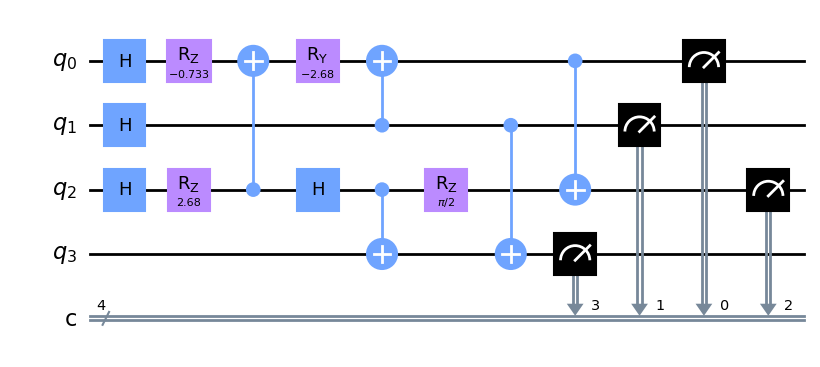

In [4]:
qc.draw(output = "mpl")

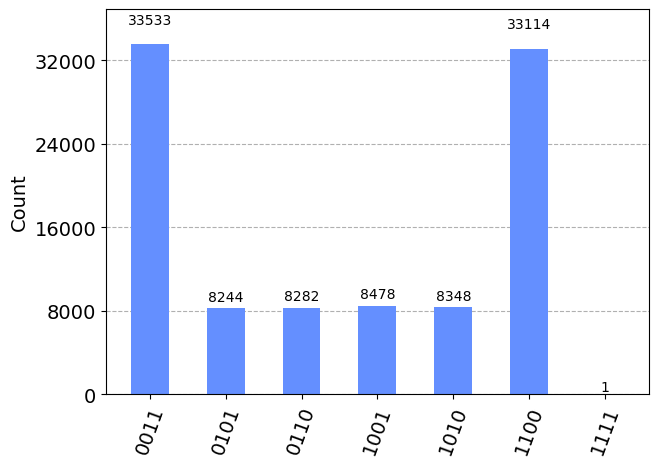

In [6]:
job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots = 100000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

In [10]:
n = 4
q1, q2, q3, q4 = 0, 1, 2, 3, 
qreg = QuantumRegister(n, "q")
qc = QuantumCircuit(qreg)


qc.h(q1)
qc.h(q2)
qc.h(q3)
qc.rz(-0.733,q1)
qc.rz(2.68,q3)
qc.cx(q3,q1)
qc.ry(-2.68,q1)
qc.h(q3)
qc.cx(q2,q1)
qc.cx(q3,q4)
qc.rz(np.pi/2,q3)
qc.cx(q2,q4)
qc.cx(q1,q3)

qc.draw(output = "mpl").savefig("../figures/LoopCircuit_v2.pdf", pad_inches = 0.1 , bbox_inches = 'tight', format = "pdf", dpi = 2000)